In [ ]:
!pip install mediapipe

# 1. Import

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
import random
from tqdm.notebook import tqdm

# 2. Keypoints using Mediapipe Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
# Test OpenCV video
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(frame.shape)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [45]:
len(results.left_hand_landmarks.landmark)

21

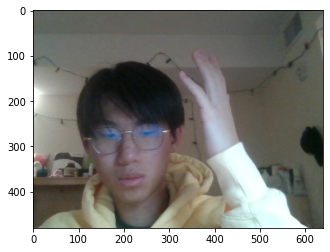

In [46]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [47]:
draw_styled_landmarks(frame,results)

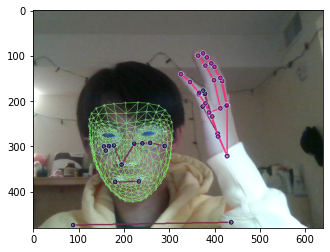

In [48]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoints Values

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [7]:
def extract_keypoints_aug(results,xval,yval):
    pose = np.array([[res.x+xval, res.y+yval, res.z, res.visibility] if res.x != 0 and res.y!= 0 else [res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x+xval, res.y+yval, res.z] if res.x != 0 and res.y!= 0 else [res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x+xval, res.y+yval, res.z] if res.x != 0 and res.y!= 0 else [res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x+xval, res.y+yval, res.z] if res.x != 0 and res.y!= 0 else [res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [49]:
result_test = extract_keypoints(results)

In [31]:
np.set_printoptions(threshold=np.inf)

In [53]:
result_test_aug = extract_keypoints_aug(results, random.uniform(0.01,0.05),random.uniform(0.01,0.05))

# 4. Setup

In [2]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('data') 
SAVE_PATH = os.path.join('keypoints')

# Actions that we try to detect
# actions = []
# for folder in os.listdir(DATA_PATH):
#     if len(os.listdir(os.path.join(DATA_PATH, folder)))==0:
#         continue
#     else:
#         actions.append(folder)


# Number of videos worth of data
no_sequences = 32

# Videos are going to be 30 frames in length
sequence_length = 60

In [57]:
# Save action list into np array
np.save('actions_list.npy',actions)

In [3]:
# Load action list from np array
# actions = np.load('actions_list.npy')
actions = ['can','you','help','me','your','name','what','hamburger','french fries','hello','bye','excuse me','sorry','water','thanks','yesterday']
# 'yes','no','wait','food','who','family','want','when','clothe','home','day','night','mom','dad','boy','girl','school','brother','sister','hot','cold','please','stop','cat','dog','I love you','car','today','tomorrow','why','where','church','hungry','thirsty']

In [37]:
len(actions)

16

In [34]:
os.makedirs(SAVE_PATH,exist_ok=True)
for action in actions:
    os.makedirs(os.path.join(SAVE_PATH, action),exist_ok=True)

# 5. Extract Keypoints & Augment for Collected dataset

In [38]:
# for label in tqdm(os.listdir(DATA_PATH)):
for label in tqdm(actions):
    LABEL_PATH = os.path.join(DATA_PATH,label)
    for video in os.listdir(LABEL_PATH):
        for frame in os.listdir(os.path.join(LABEL_PATH,video)):
            if frame.endswith('.jpg'):
#                 print(f'Reading {os.path.join(LABEL_PATH,video,frame)}...')

                # Capture video
                image = cv2.imread(os.path.join(LABEL_PATH,video,frame))
                # Set mediapipe model 
                with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                    # Make detections
                    image_flipped, results_flipped = mediapipe_detection(cv2.flip(image,1), holistic)
                    image, results = mediapipe_detection(image, holistic)
                    
                    # Draw detections for debugging
#                     draw_styled_landmarks(image, results)
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(10)         

#                     Export keypoints & augment
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(SAVE_PATH,label,video+"_"+frame.replace(".jpg", "")+".npy")
                    np.save(npy_path, keypoints)
                
                    keypoints_aug = extract_keypoints_aug(results,random.uniform(0.01,0.03),random.uniform(0.01,0.03))
                    npy_path_aug = os.path.join(SAVE_PATH,label,video+"_"+frame.replace(".jpg", "")+"_AUG.npy")
                    np.save(npy_path_aug, keypoints_aug)

                    keypoints_flipped = extract_keypoints(results_flipped)
                    npy_path_flipped = os.path.join(SAVE_PATH,label,video+"_"+frame.replace(".jpg", "")+"_MIR.npy")
                    np.save(npy_path_flipped, keypoints_flipped)                   

  0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
# sanity check that the data collected is correct
# for label in os.listdir(SAVE_PATH):
#     LABEL_PATH = os.path.join(MP_DATA_PATH,label)
#     for filename in os.listdir(LABEL_PATH):
#         if not filename.endswith('.mp4'):
#             for npfile in os.listdir(os.path.join(LABEL_PATH,filename)):
#                 print(np.load(os.path.join(LABEL_PATH,filename,npfile)))
#                 break

# 6. Preprocess Data and Create Labels and Features

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'can': 0, 'you': 1, 'help': 2, 'me': 3, 'your': 4, 'name': 5, 'what': 6, 'hamburger': 7, 'french fries': 8, 'hello': 9, 'bye': 10, 'excuse me': 11, 'sorry': 12, 'water': 13, 'thanks': 14, 'yesterday': 15}


In [6]:
sequences, labels = [], []
for action in tqdm(label_map.keys()):
    if  os.path.exists(os.path.join(SAVE_PATH, action)):
        for sequence in range(1,no_sequences+1):
            window = []
            last_frame = 0
            for frame_num in range(sequence_length):
                if  os.path.exists(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}.npy".format(frame_num))): 
                    res = np.load(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}.npy".format(frame_num)))
                    last_frame = frame_num
                else: # if the video length is shorter than sequence length, need to pad
    #                 res = np.zeros((1662,),dtype='float64') # zero padding
                    res = np.load(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}.npy".format(last_frame))) # last frame padding
                window.append(res)

            # repeat for aug and mir
            window_aug = []
            last_frame = 0
            for frame_num in range(sequence_length):
                if  os.path.exists(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}_AUG.npy".format(frame_num))): 
                    res = np.load(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}_AUG.npy".format(frame_num)))
                    last_frame = frame_num
                else: 
                    res = np.load(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}_AUG.npy".format(last_frame))) # last frame padding
                window_aug.append(res)
                       
            window_mir = []
            last_frame = 0
            for frame_num in range(sequence_length):
                if  os.path.exists(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}_MIR.npy".format(frame_num))): 
                    res = np.load(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}_MIR.npy".format(frame_num)))
                    last_frame = frame_num
                else: 
                    res = np.load(os.path.join(SAVE_PATH, action, str(sequence)+"_"+"{}_MIR.npy".format(last_frame))) # last frame padding
                window_mir.append(res)

            sequences.append(window)
            labels.append(label_map[action])
            sequences.append(window_aug)
            labels.append(label_map[action])
            sequences.append(window_mir)
            labels.append(label_map[action])

  0%|          | 0/16 [00:00<?, ?it/s]

In [7]:
X = np.array(sequences)

In [8]:
X.shape

(1536, 60, 1662)

In [9]:
y = to_categorical(labels,num_classes=len(actions)).astype(int)
y = np.argmax(y, axis=1).reshape(-1, 1)

In [10]:
info = [len(y[y==i]) for i in range(len(actions))]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
info = [len(y_test[y_test==i]) for i in range(len(actions))]

In [13]:
info

[12, 7, 8, 10, 10, 5, 13, 9, 6, 7, 16, 14, 12, 6, 7, 12]

In [14]:
np.save(os.path.join("transformer_data","train_data.npy"),X_train)
np.save(os.path.join("transformer_data","train_labels.npy"),y_train)
np.save(os.path.join("transformer_data","test_data.npy"),X_test)
np.save(os.path.join("transformer_data","test_labels.npy"),y_test)